# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [198]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [199]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
%pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [201]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import pycountry

### Notebook Presentation

In [217]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [218]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [219]:
df_data.shape  # (rows, columns)

(6187, 8)

In [220]:
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Date', 'Details',
       'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [221]:
df_data.isna().values.any()

True

In [222]:
# remove N/A values

df_data.dropna(inplace=True)
df_data.isna().values.any()  # check if cleared

False

In [223]:
df_data.duplicated().values.any()  # no duplicates so we can move on

False

## Descriptive Statistics

In [224]:
df_data.head()

,Unnamed: 0,Organisation,Location,Date,Details,Rocket_Status,Price,Mission_Status
0,0,Arianespace,"ELV-1, Guiana Space Centre, French Guiana, France","Tue Aug 17, 2021 01:47 UTC","Vega | Pléiades-Néo 4, BRO-4 & Others",Active,37.00,Success
1,1,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Thu Aug 12, 2021 00:13 UTC",GSLV Mk II | EOS-03,Active,47.00,Failure
2,2,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA","Tue Aug 10, 2021 22:01 UTC",Antares 230+ | Cygnus CRS NG-16,Active,85.00,Success
3,3,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Aug 05, 2021 16:30 UTC",Long March 3B/E | Zhongxing-2E,Active,29.15,Success
4,4,CASC,"LC-16, Taiyuan Satellite Launch Center, China","Wed Aug 04, 2021 11:01 UTC",Long March 6 | KL-Beta A & B,Active,19.00,Success


In [225]:
df_data.info

<bound method DataFrame.info of       Unnamed: 0  Organisation  \
0              0   Arianespace   
1              1          ISRO   
2              2      Northrop   
3              3          CASC   
4              4          CASC   
...          ...           ...   
5574        5574  US Air Force   
5740        5740  US Air Force   
5770        5770  US Air Force   
5786        5786  US Air Force   
5817        5817  US Air Force   

                                               Location  \
0     ELV-1, Guiana Space Centre, French Guiana, France   
1     Second Launch Pad, Satish Dhawan Space Centre,...   
2         LP-0A, Wallops Flight Facility, Virginia, USA   
3          LC-2, Xichang Satellite Launch Center, China   
4         LC-16, Taiyuan Satellite Launch Center, China   
...                                                 ...   
5574            SLC-4W, Vandenberg SFB, California, USA   
5740           SLC-20, Cape Canaveral SFS, Florida, USA   
5770           SLC-20, Cape 

In [226]:
df_data.describe()

,Unnamed: 0,Price
count,"2,201.00","2,201.00"
mean,"1,824.13",71.79
std,"1,355.74",107.98
min,0.00,2.50
25%,672.00,20.00
50%,"1,400.00",29.75
75%,"2,963.00",64.68
max,"5,817.00",450.00


We see this unnamed column here, and we see that it's value is equivalent to the index value, so let's get rid of both.

In [227]:
# If using the old csv file, uncomment the first 2 lines and comment the 3rd and 4th ones

# df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)  # we removed them already so rerunning this code will cause an error if you don't reload the df
# df_data

df_data.drop(['Unnamed: 0'], axis=1, inplace=True)
df_data

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [228]:
df_data.Organisation.value_counts()

RVSN USSR          657
CASC               297
Roscosmos          194
NASA               136
VKS RF             136
SpaceX             132
Arianespace        123
ULA                102
Northrop            88
ILS                 79
ISRO                68
MHI                 37
US Air Force        26
Starsem             24
Kosmotras           22
Rocket Lab          19
Eurockot            13
ExPace              11
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
Virgin Orbit         3
Astra                2
GK LS                1
Sandia               1
ESA                  1
EER                  1
Galactic Energy      1
Name: Organisation, dtype: int64

In [229]:
df_data.Organisation.unique()

array(['Arianespace', 'ISRO', 'Northrop', 'CASC', 'Rocket Lab',
       'Roscosmos', 'Starsem', 'SpaceX', 'Virgin Orbit', 'VKS RF', 'ULA',
       'GK LS', 'Astra', 'MHI', 'Galactic Energy', 'ExPace', 'JAXA',
       'ILS', 'Eurockot', 'Sandia', 'Kosmotras', 'ESA', 'NASA', 'Boeing',
       'Lockheed', 'EER', 'Martin Marietta', 'RVSN USSR', 'US Air Force'],
      dtype=object)

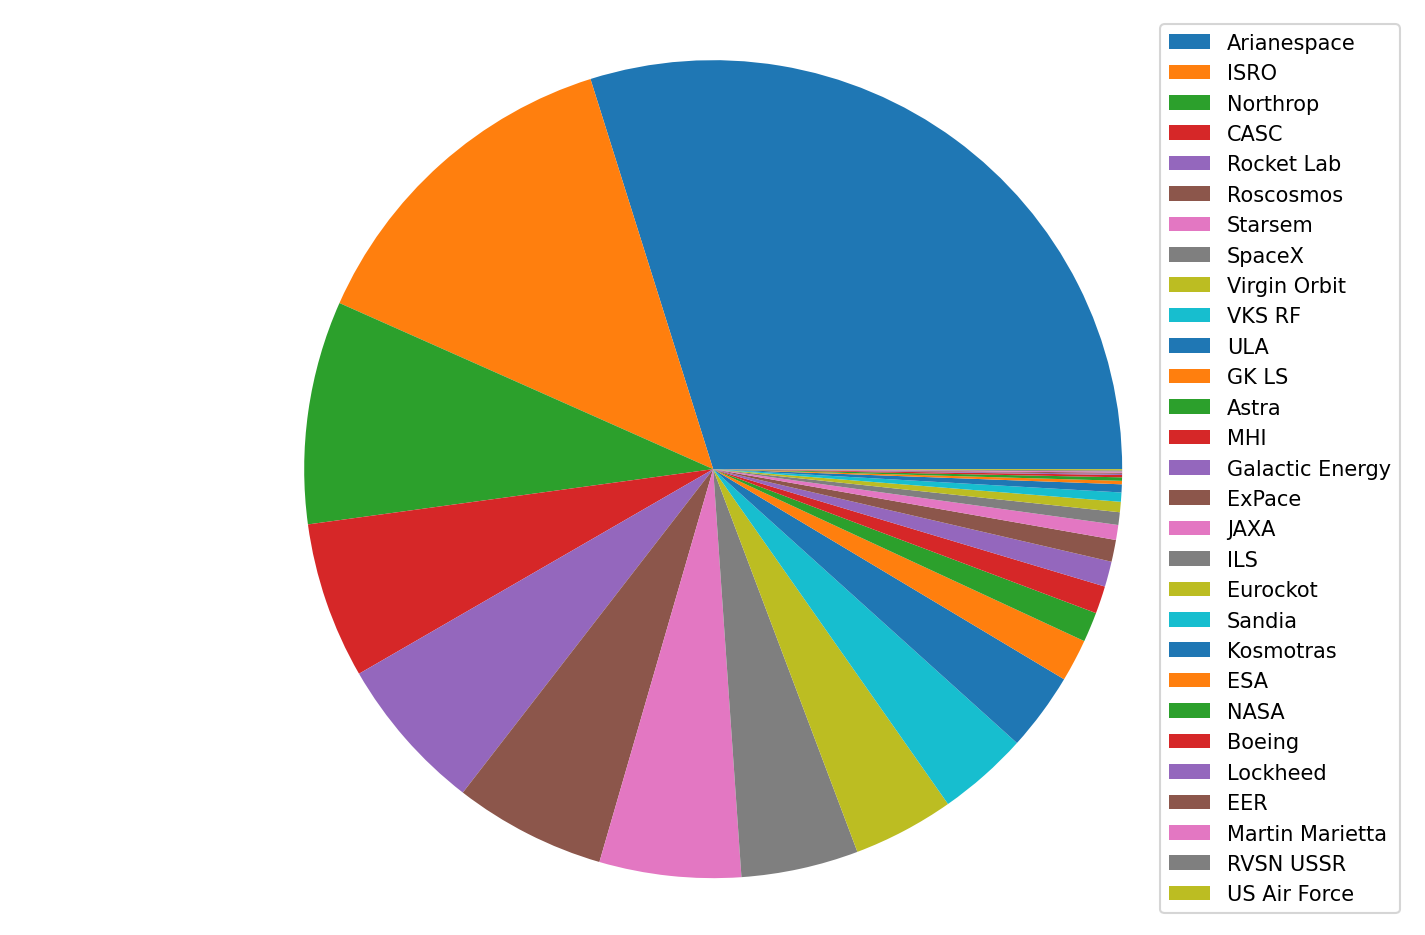

In [230]:
plt.figure(figsize=(12,8), dpi=150)

plt.pie(df_data.Organisation.value_counts(),
        labels = df_data.Organisation.unique(),  # get the cols
        labeldistance = None,  # remove labels because they are too cluttereds
)

plt.legend(loc='best')  # moves the legend to the best place

plt.axis('equal')  # makes sure pie chart is drawn as a circle

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [275]:
# if using old csv, change to 'StatusActive' instead of 'Active'

active_rockets = df_data[df_data.Rocket_Status == 'Active'].count()[0]
decom_rockets = df_data[df_data.Rocket_Status != 'Active'].count()[0]  # specify 0 because otherwise it returns the count for every column

In [276]:
print(f"There are {active_rockets} active rockets and {decom_rockets} decommissioned rockets.\nThe percentage of active rockets is {active_rockets*100/(active_rockets+decom_rockets):.4}% and the percentage of"
      +f" decommissioned rockets is {decom_rockets*100/(active_rockets+decom_rockets):.4}%.")

There are 969 active rockets and 1232 decommissioned rockets.
The percentage of active rockets is 44.03% and the percentage of decommissioned rockets is 55.97%.


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [233]:
successes = df_data[df_data.Mission_Status == 'Success'].count()[0]
failures = df_data[df_data.Mission_Status != 'Success'].count()[0]  # specify 0 because otherwise it returns the count for every column

In [234]:
print(f"There are {successes} mission successes and {failures} mission failures.")  # omit percentages because there are partial failures

There are 2103 mission successes and 98 mission failures.


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [235]:
df_data.Price = df_data.Price.replace(',','', regex=True)  # remove the commas
df_data = df_data.astype({'Price':'float'})  # cast price into float values so we can plot it easier

In [279]:
df_data.Price.describe()

count   2,201.00
mean       71.79
std       107.98
min         2.50
25%        20.00
50%        29.75
75%        64.68
max       450.00
Name: Price, dtype: float64

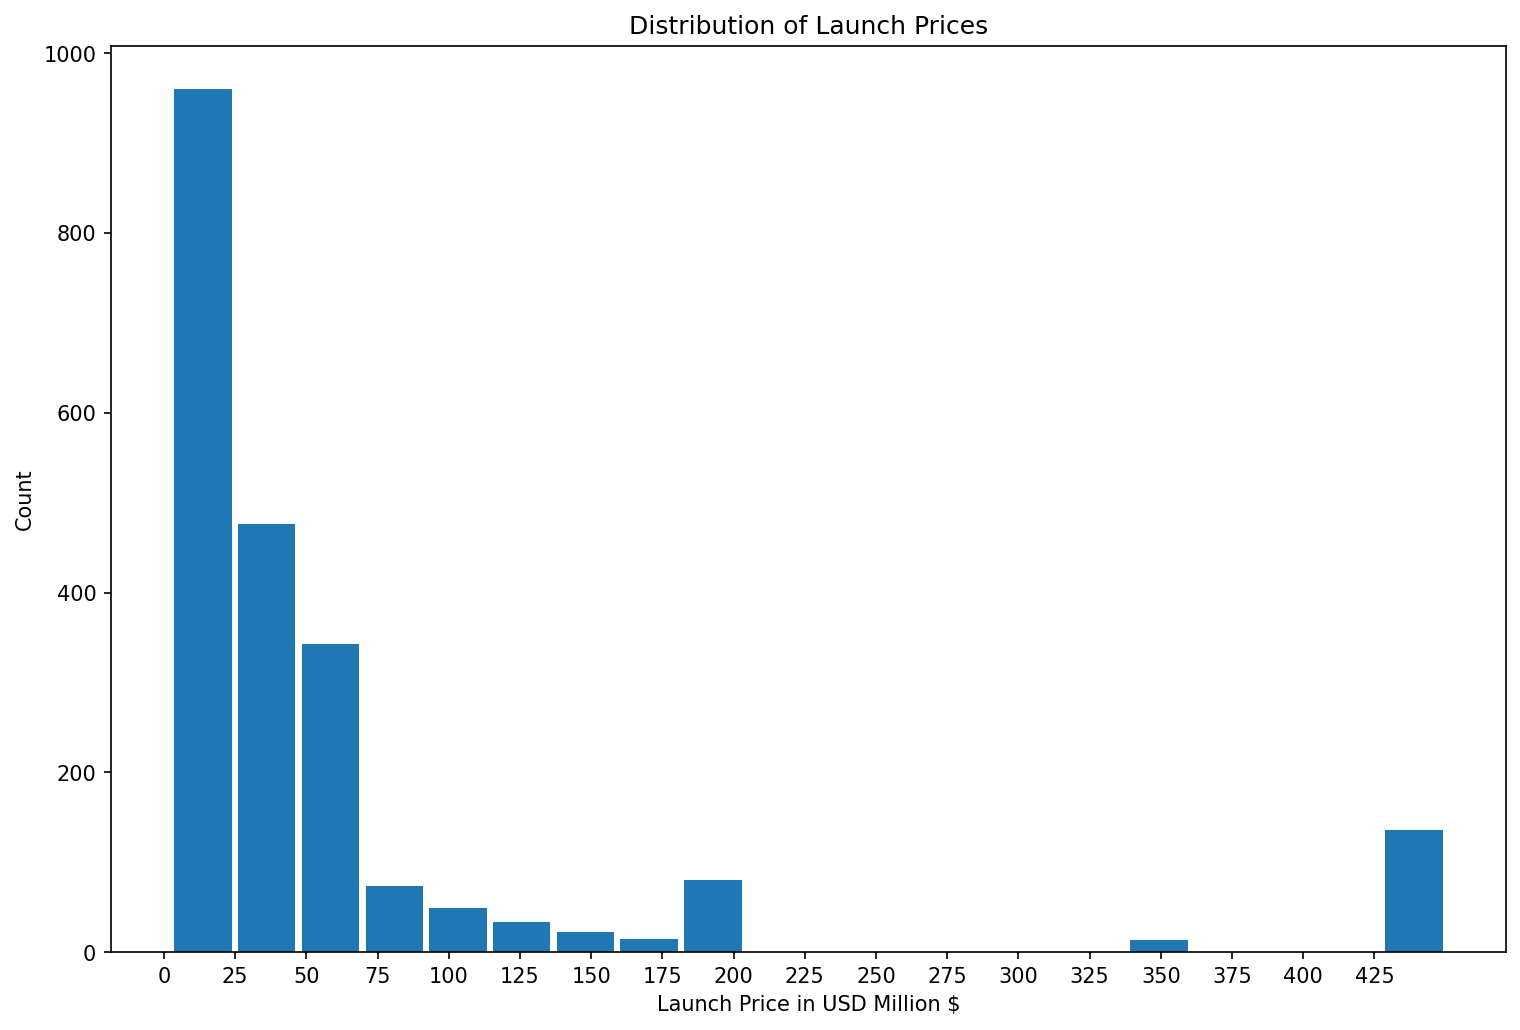

In [286]:
plt.figure(figsize=(12,8), dpi=150)

plt.hist(
    x = df_data.Price,
    bins=20,
    # range=[5,1200]  #uncomment this if using old csv
    rwidth=0.9,
)

plt.xlabel('Launch Price in USD Million $')
plt.ylabel('Count')
plt.title('Distribution of Launch Prices')

plt.xticks(np.arange(0, 450, step=25), np.arange(0, 470, step=25))
# plt.xticks(np.arange(0, 1200, step=50), np.arange(0, 1200, step=50)) uncomment if using old csv

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [237]:
# create a new column with only the country name because we only have location data for our dataframe

df_data['Country'] = df_data.Location.str.split(', ').str[-1]

In [238]:
# change the countries that no longer exist so we can get the 3 letter codes

df_data.Country = df_data.Country.str.replace('Gran Canaria', 'USA')
df_data.Country = df_data.Country.str.replace('Yellow Sea', 'China')
df_data.Country = df_data.Country.str.replace('Russia', 'Russian Federation')
df_data.Country = df_data.Country.str.replace('Pacific Missile Range Facility', 'Iran')
df_data.Country = df_data.Country.str.replace('Barents Sea', 'Russian Federation')
df_data.Country = df_data.Country.str.replace('Shahrud Missile Test Site', 'Iran')
df_data.Country = df_data.Country.str.replace('New Mexico', 'USA')

In [239]:
country_codes = []

for country in df_data.Country:
  try:
    country_codes.append(pycountry.countries.get(name=country).alpha_3)
  except AttributeError:
    country_codes.append(country)  # alpha 3 code for USA is USA, trying to get it using the above line of code will give an error as it returns None

In [240]:
df_data['Country_Codes'] = country_codes  # create a new col with alpha 3 codes so we can easily create chloropleths from now on 
country_code_vs_launches =  df_data.Country_Codes.value_counts()  # create a new df which includes country codes and number of launches (which is number of rows for each country)

In [241]:
country_code_vs_launches

KAZ     587
RUS     531
USA     513
CHN     309
FRA     124
IND      68
JPN      40
NZL      19
MHL       9
Iran      1
Name: Country_Codes, dtype: int64

In [242]:
fig = px.choropleth(
    country_code_vs_launches,  # base dataframe
    locations=country_code_vs_launches.index,  # ISO codes
    locationmode='ISO-3',
    color=country_code_vs_launches,  # specify to color each country by the number of launches
    color_continuous_scale=px.colors.sequential.matter,  # color scale
    title='Launches Per Country',
    labels={'color':'Launches'},  # change colors to launches
)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [243]:
country_total_fails = df_data.Country_Codes[df_data.Mission_Status == 'Failure'].value_counts()

In [244]:
fig2 = px.choropleth(
    country_total_fails,  # base dataframe
    locations=country_total_fails.index,  # ISO codes
    locationmode='ISO-3',
    color=country_total_fails,  # specify to color each country by the number of launches
    color_continuous_scale=px.colors.sequential.matter,  # color scale
    title='Launches Per Country',
    labels={'color':'Failed Launches'},  # change colors to launches
)

fig2.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [245]:
fig3 = px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status']
)

fig3.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [246]:
total_spent_per_org = df_data.groupby('Organisation').agg({'Price':pd.Series.sum})
total_spent_per_org.rename(columns={'Price':'Total_Spent'}, inplace=True)

In [247]:
total_spent_per_org

,Total_Spent
Organisation,
Arianespace,"17,386.00"
Astra,5.00
Boeing,"1,241.00"
CASC,"12,079.56"
EER,20.00
ESA,37.00
Eurockot,169.00
ExPace,86.30
GK LS,23.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [248]:
launches_per_org = df_data.groupby('Organisation').agg({'Organisation':pd.Series.count})
launches_per_org.rename(columns={'Organisation':'Launches'}, inplace=True)

In [249]:
total_spent_per_org['Avg_Per_Launch'] = total_spent_per_org['Total_Spent']/launches_per_org.Launches

In [250]:
total_spent_per_org

,Total_Spent,Avg_Per_Launch
Organisation,,
Arianespace,"17,386.00",141.35
Astra,5.00,2.50
Boeing,"1,241.00",177.29
CASC,"12,079.56",40.67
EER,20.00,20.00
ESA,37.00,37.00
Eurockot,169.00,13.00
ExPace,86.30,7.85
GK LS,23.00,23.00


# Chart the Number of Launches per Year

In [251]:
# split once by comma to get 2nd half of string, then split again by space and take the first string
# since to_datetime() is now working for this data

yearly_launches = df_data.Date.str.split(', ').str[1].str.split(' ').str[0]
yearly_launches = yearly_launches.value_counts(sort=False)

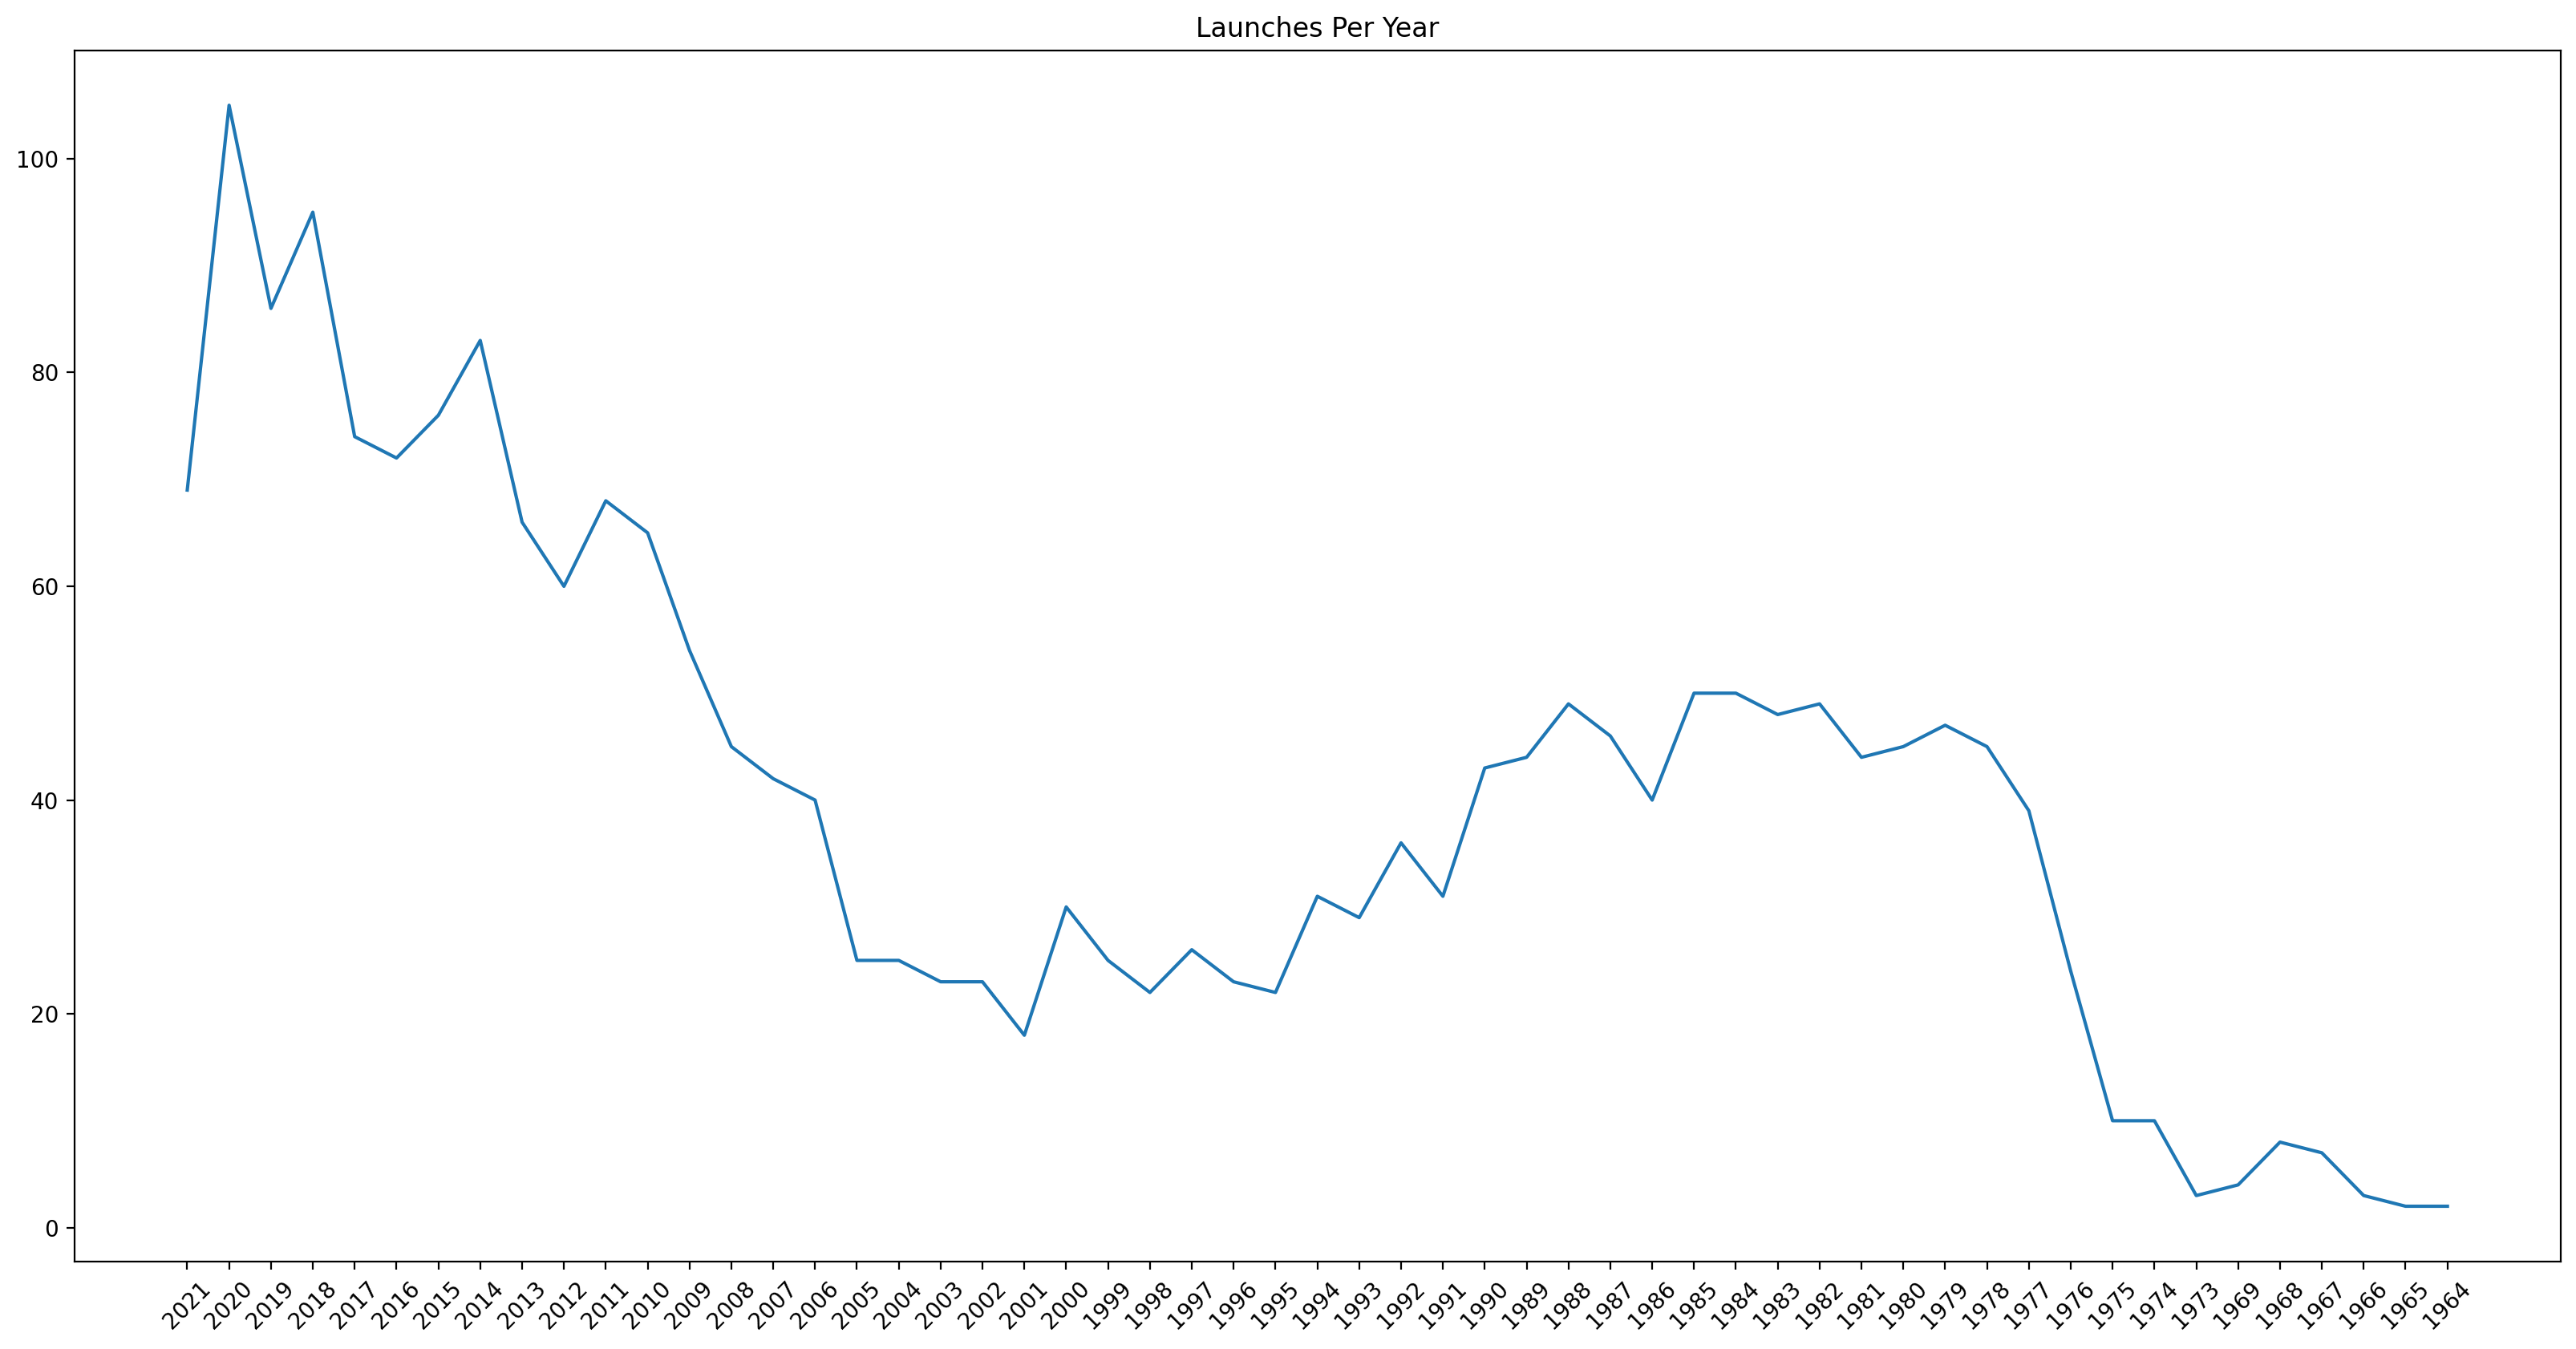

In [252]:
plt.figure(figsize=(20, 10), dpi=200)

plt.plot(yearly_launches.index, yearly_launches)

plt.xticks(ticks=yearly_launches.index, rotation=45)

plt.title('Launches Per Year')

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [253]:
monthly_launches = df_data.Date.str.split(' ').str[1]
monthly_launches = monthly_launches.value_counts()

In [254]:
monthly_launches  # december is the most popular month, but not by alot, there doesn't seem to be a trend

Dec    223
Sep    214
May    202
Apr    197
Aug    193
Jun    192
Oct    186
Jul    185
Nov    172
Mar    159
Feb    144
Jan    134
Name: Date, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [255]:
# let's get the average price of rocket launches per year
df_data['Year'] = df_data.Date.str.split(', ').str[1].str.split(' ').str[0]

In [256]:
avg_price_per_year = df_data.groupby('Year').agg({'Price':pd.Series.mean})

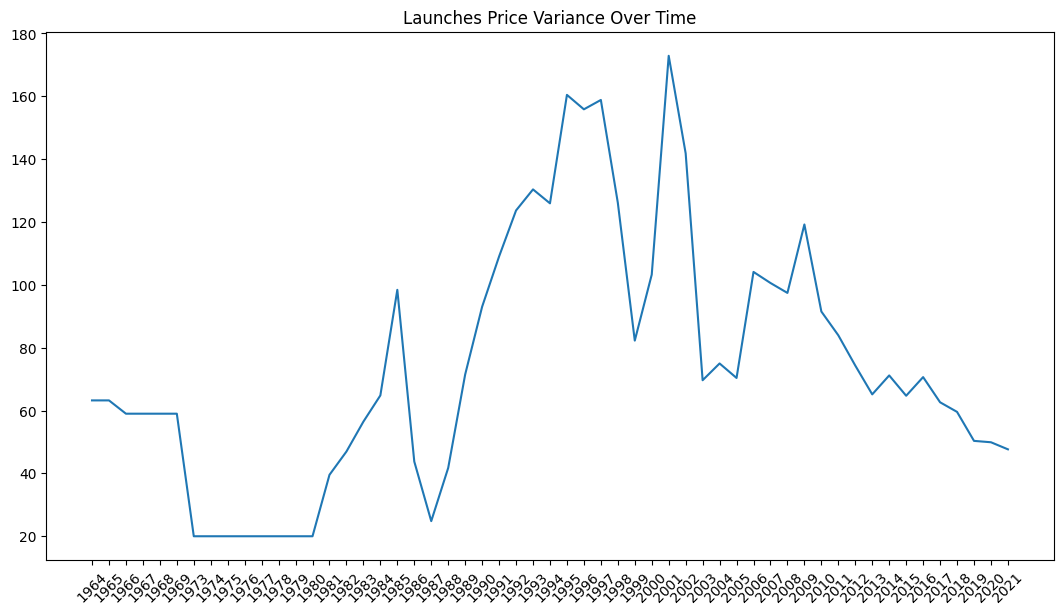

In [257]:
plt.figure(figsize=(13, 7), dpi=100)

plt.plot(avg_price_per_year.index, avg_price_per_year.Price)

plt.xticks(ticks=avg_price_per_year.index, rotation=45)

plt.title('Launches Price Variance Over Time')

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [258]:
top_10_orgs = df_data.groupby(['Organisation', 'Year']).agg({'Price':pd.Series.mean})

In [259]:
top_10_orgs

Price
Organisation Year       
Arianespace  2002 200.00
             2004 190.00
             2005 200.00
             2006 200.00
             2007 200.00
...                  ...
VKS RF       2019  20.67
             2020  35.43
             2021  20.00
Virgin Orbit 2020  12.00
             2021  12.00

[355 rows x 1 columns]

In [260]:
# use get_level_values because we have a multiindex, this allows us to create a sunburst

fig5 = px.sunburst(top_10_orgs, path=[top_10_orgs.index.get_level_values(0), top_10_orgs.index.get_level_values(1), 'Price'])
fig5.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [261]:
df_data.Year = pd.to_numeric(df_data.Year)

df_cold_war = df_data[df_data.Year <= 1991]  # get all data from before and up until 1991 

In [262]:
df_cold_war.head()  # we can see from the latest data is from 1991 now

,Organisation,Location,Date,Details,Rocket_Status,Price,Mission_Status,Country,Country_Codes,Year
2467,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Dec 17, 1991 11:00 UTC",Soyuz U | Cosmos 2174,Retired,20.00,Success,Kazakhstan,KAZ,1991
2472,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 1991 23:44 UTC",Space Shuttle Atlantis | STS-44,Retired,450.00,Success,USA,USA,1991
2474,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Wed Nov 20, 1991 19:14 UTC",Soyuz U | Cosmos 2171,Retired,20.00,Success,Russian Federation,RUS,1991
2479,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu Oct 17, 1991 00:05 UTC",Soyuz U2 | Progress M-10,Retired,40.00,Success,Kazakhstan,KAZ,1991
2481,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Wed Oct 09, 1991 13:15 UTC",Soyuz U2 | Cosmos 2163,Retired,40.00,Success,Kazakhstan,KAZ,1991


## Create a Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [263]:
df_cold_war = df_cold_war[(df_cold_war.Country == 'Russian Federation') | (df_cold_war.Country == 'Kazakhstan') | (df_cold_war.Country == 'USA')]  # get USSR launches and USA launches as seperate DFs

In [264]:
df_cold_war.Country = df_cold_war.Country.str.replace('Russian Federation', 'USSR')
df_cold_war.Country = df_cold_war.Country.str.replace('Kazakhstan', 'USSR')
df_cold_war.rename(columns={'Country':'Region'}, inplace=True)

In [265]:
USA_vs_USSR_launches = pd.DataFrame({'Region': ['USA', 'USSR'], 'Launches': [df_cold_war[df_cold_war.Region == 'USA'].count()[0], df_cold_war[df_cold_war.Region == 'USSR'].count()[0]]})
USA_vs_USSR_launches  # create this array so we can easily plot it on the pie chart

,Region,Launches
0,USA,77
1,USSR,657


In [266]:
plt.figure(figsize=(8,8), dpi=100)

fig6 = px.pie(
    USA_vs_USSR_launches,
    names='Region',
    values='Launches',
    title='USA vs USSR Launches Before and During the Cold War Space Race'
)

fig6.show()

<Figure size 800x800 with 0 Axes>

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [267]:
launches_per_year = df_cold_war.groupby(['Year', 'Region']).size().reset_index(name='Launches')
launches_per_year.head()

,Year,Region,Launches
0,1964,USA,2
1,1965,USA,2
2,1966,USA,3
3,1967,USA,7
4,1968,USA,8


In [268]:
fig7 = px.line(
    launches_per_year,
    x='Year',
    y='Launches',
    color='Region',
)

fig7.show()

## Chart the Total Number of Mission Failures Year on Year.

In [269]:
failures_per_year = df_cold_war[df_cold_war.Mission_Status == 'Failure'].groupby(['Year', 'Region']).size().reset_index(name='Launches')
failures_per_year.head()

,Year,Region,Launches
0,1964,USA,1
1,1967,USA,1
2,1974,USSR,1
3,1976,USSR,1
4,1977,USSR,2


In [270]:
fig8 = px.line(
    failures_per_year,
    x='Year',
    y='Launches',
    color='Region',
)

fig8.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Successful Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [271]:
yearly_successes = df_data[(df_data.Mission_Status == 'Success') & (df_data.Year <= 2020)].groupby(['Year', 'Country']).size().reset_index(name='Launches')
yearly_successes.head()

,Year,Country,Launches
0,1964,USA,1
1,1965,USA,2
2,1966,USA,3
3,1967,USA,5
4,1968,USA,8


In [272]:
fig9 = px.line(
    yearly_successes,
    x='Year',
    y='Launches',
    color='Country',
)

fig9.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [273]:
yearly_org_launches = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')
yearly_org_launches.head()

,Year,Organisation,Launches
0,1964,US Air Force,2
1,1965,US Air Force,2
2,1966,US Air Force,3
3,1967,US Air Force,7
4,1968,US Air Force,8


In [274]:
fig10 = px.line(
    yearly_org_launches,
    x='Year',
    y='Launches',
    color='Organisation',
)

fig10.show()